In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0


In [5]:
df.shape

(200, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
thalach: maximum heart rate achieved
exang:exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
num: diagnosis of heart disease (angiographic disease status)
        -- Value 0:
        -- Value 1:
           Value 2: 
           Value 3:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  num       200 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


In [8]:
df["num"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [9]:
df["num"].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [10]:
#Mean>Median in chol,thalach- data can be skewed
#Large difference between 75% and max outliers may be present
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,0.0,1.070000,1.520000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,0.0,2.427874,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


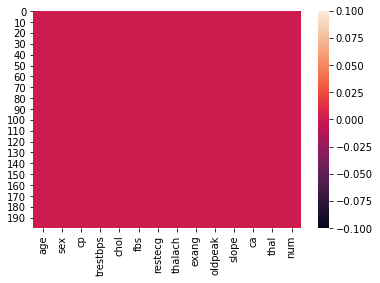

In [11]:
#No null value present 
sns.heatmap(df.isnull())

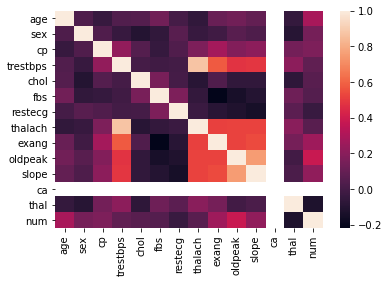

In [12]:
#Strongly negatively corellate-thal,restecg.Neutral correlate-age,oldpeak,exang
dfcor=df.corr()
sns.heatmap(dfcor)

In [13]:
#Skew
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.750363
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach    -0.715818
exang       0.100883
oldpeak     0.823429
slope       0.468819
ca          0.000000
thal        1.905183
num         0.297393
dtype: float64

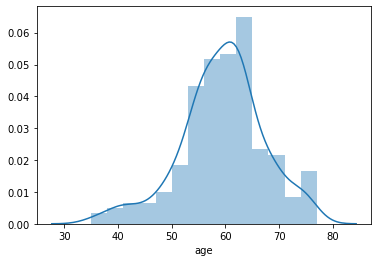

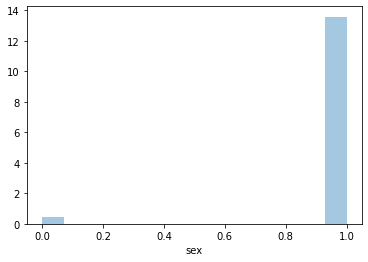

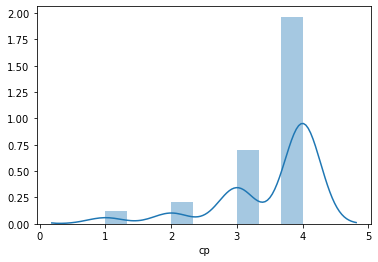

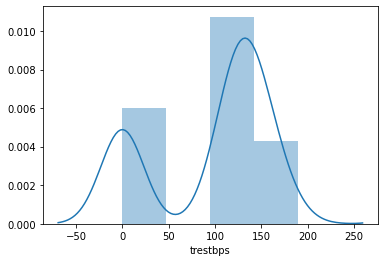

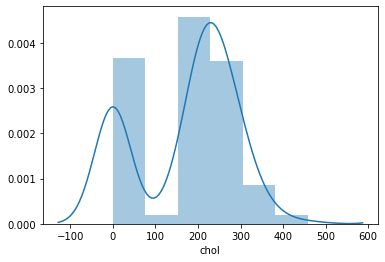

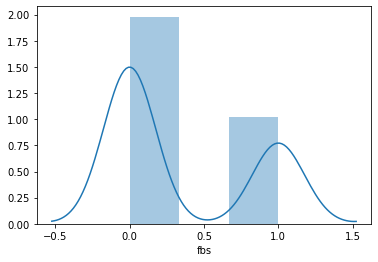

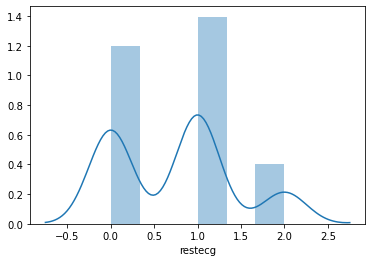

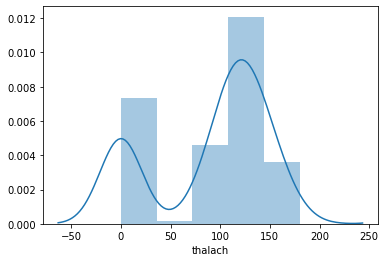

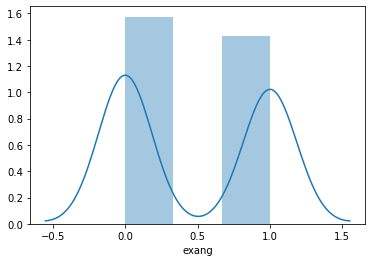

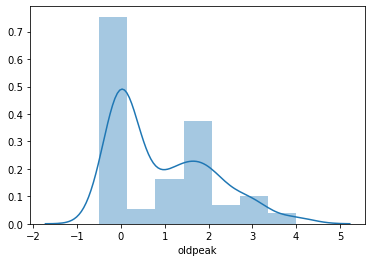

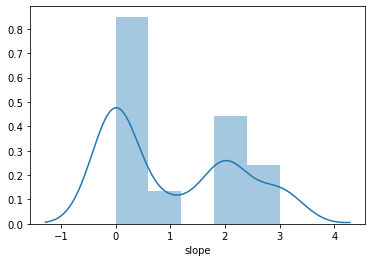

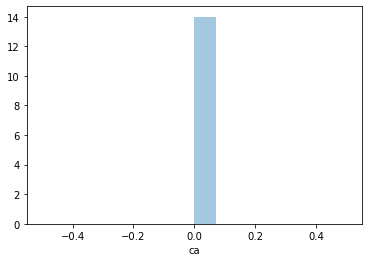

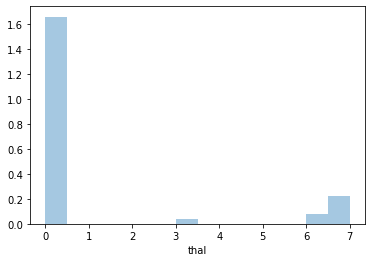

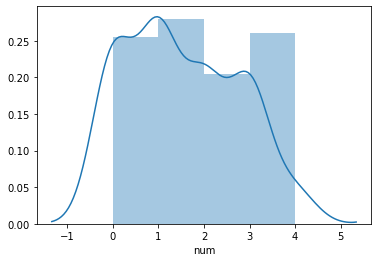

In [14]:
#Oldpeak and slope-right skewed
collist=df.columns.values
ncol=10
nrow=20
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

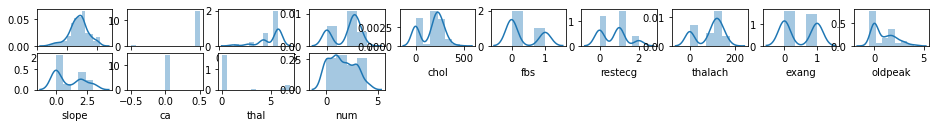

In [15]:
plt.figure(figsize=(16,16))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [46]:
#Remove Skewness
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df,method='yeo-johnson')
new=pd.DataFrame(pt,columns=df.columns)

In [47]:
new.skew()

age         0.017837
sex        -5.552105
cp         -0.771030
trestbps   -0.883142
chol       -0.834251
fbs         0.680636
restecg    -0.017341
thalach    -0.910359
exang       0.100883
oldpeak     0.141663
slope       0.170620
ca          0.000000
thal        1.770451
num        -0.087303
dtype: float64

age            AxesSubplot(0.125,0.536818;0.0731132x0.343182)
sex         AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
cp          AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
trestbps    AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
chol        AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
fbs         AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
restecg     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
thalach     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
exang       AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
oldpeak           AxesSubplot(0.125,0.125;0.0731132x0.343182)
slope          AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ca             AxesSubplot(0.300472,0.125;0.0731132x0.343182)
thal           AxesSubplot(0.388208,0.125;0.0731132x0.343182)
num            AxesSubplot(0.475943,0.125;0.0731132x0.343182)
dtype: object

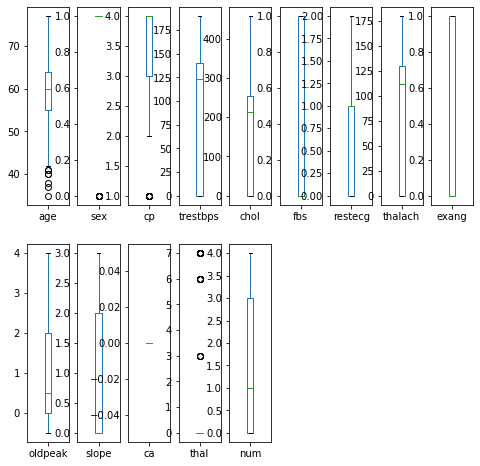

In [48]:
# Outliers are present 
df.plot(kind='box',subplots=True,layout=(2,9),figsize=(8,8))

In [51]:
#all values are 0
new=df.drop(["ca"],axis=1) 

In [52]:
#Remove Outliers
from scipy.stats import zscore
z=np.abs(zscore(new))
threshold=3
print(np.where(z>3))
df_new=new[(z<3).all(axis=1)]
df_new

(array([ 51,  66,  72,  76,  79,  96,  97, 126, 128, 131, 133, 137, 190,
       195, 196], dtype=int64), array([1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2], dtype=int64))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158,170,0,1,138,1,0.0,0,0,1
194,46,1,4,134,310,0,0,126,0,0.0,0,3,2
197,55,1,4,122,223,1,1,100,0,0.0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0


In [53]:
print(df.shape) #dataset
print(new.shape) #removed ca column
print(df_new.shape) #Removed Outliers

(200, 14)
(200, 13)
(185, 13)


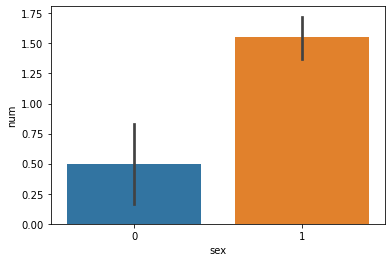

In [54]:
#Visualization
#Male having more heart disease compared to female
sns.barplot(x="sex",y="num",data=df)

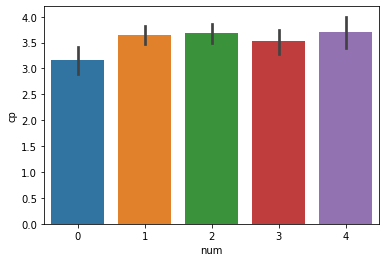

In [55]:
sns.barplot(x="num",y="cp",data=df)

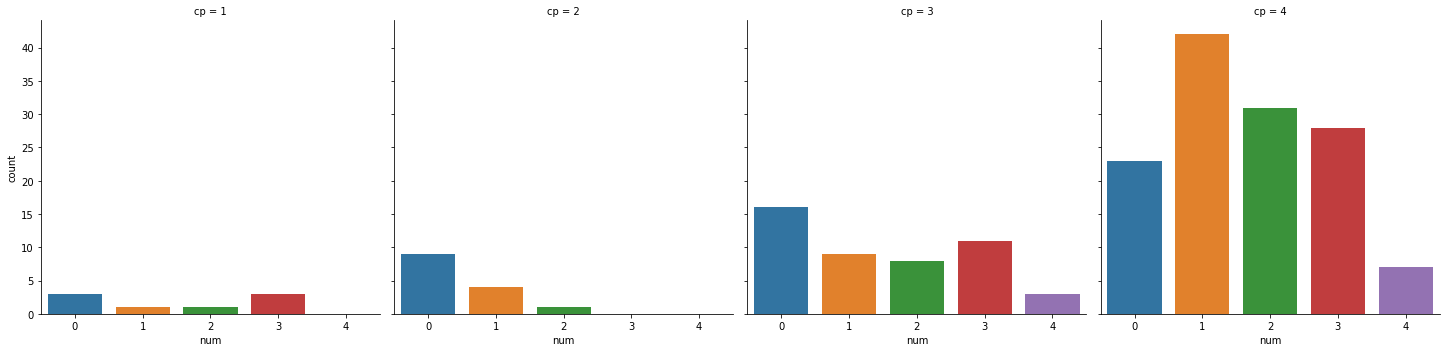

In [56]:
#asymptomatic chest pain has more chances of heart disease
sns.catplot(x='num', col='cp', kind='count', data=df);

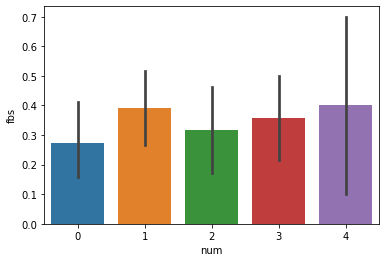

In [57]:
#nothing can be found
sns.barplot(x="num",y="fbs",data=df)

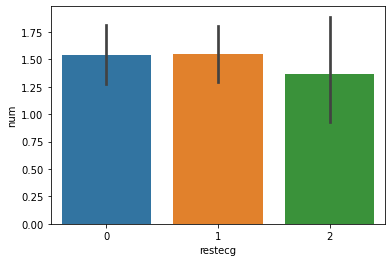

In [58]:
#having ST-T wave abnormality Value 1 has more chances of heart disease
sns.barplot(x="restecg",y="num",data=df)

<function matplotlib.pyplot.show(*args, **kw)>

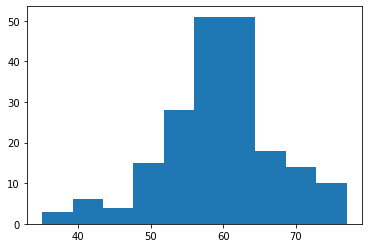

In [59]:
#Majority is between age 55 to 65
plt.hist(df['age'],bins=10)
plt.show

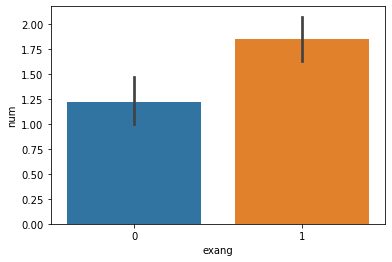

In [60]:
#exercise induced angina 1  more chances of heart diease 
sns.barplot(x="exang",y="num",data=df)

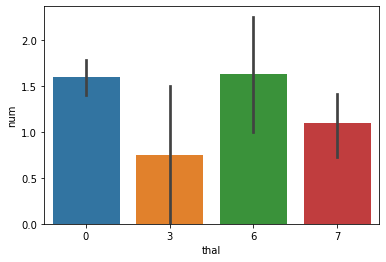

In [61]:
#thal 6 6 = fixed defect  more chances of heart diease 
sns.barplot(x="thal",y="num",data=df)

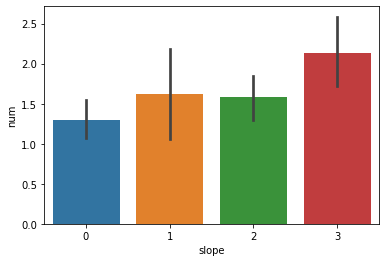

In [62]:
#Slope 3 downsloping more chances of heart diease 
sns.barplot(x="slope",y="num",data=df)

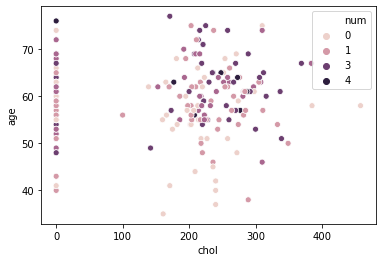

In [63]:
#more chol more heart diease 
sns.scatterplot(x='chol', y='age', data=df, hue='num')

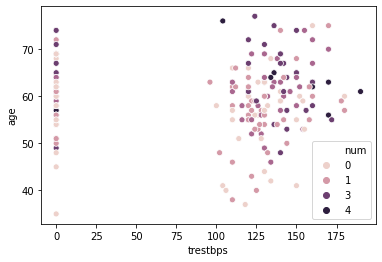

In [64]:
#more trestbps more heart diease 
sns.scatterplot(x='trestbps', y='age', data=df, hue='num')

In [33]:
df_x=df_new.drop(columns=['num'])
y=pd.DataFrame(df_new['num'])
x=pd.DataFrame(df_x)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=df_x.columns)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [37]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(129, 12) 	 (56, 12)
(129, 1) 	 (56, 1)


In [38]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for m in model:
    m.fit(x_train,y_train)
    print('score',m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score",accuracy_score(y_test,predm))
    print("confusion matrix",confusion_matrix(y_test,predm))
    print("classification report",classification_report(y_test,predm))
    print("*********************************************")
    print("\n")

score DecisionTreeClassifier() is 1.0
accuracy score 0.25
confusion matrix [[4 4 2 3 1]
 [4 4 2 2 2]
 [3 3 5 4 1]
 [1 4 3 1 1]
 [0 1 1 0 0]]
classification report               precision    recall  f1-score   support

           0       0.33      0.29      0.31        14
           1       0.25      0.29      0.27        14
           2       0.38      0.31      0.34        16
           3       0.10      0.10      0.10        10
           4       0.00      0.00      0.00         2

    accuracy                           0.25        56
   macro avg       0.21      0.20      0.20        56
weighted avg       0.27      0.25      0.26        56

*********************************************


score KNeighborsClassifier() is 0.49612403100775193
accuracy score 0.3392857142857143
confusion matrix [[8 3 2 0 1]
 [5 4 2 2 1]
 [3 5 4 3 1]
 [2 2 2 3 1]
 [0 1 1 0 0]]
classification report               precision    recall  f1-score   support

           0       0.44      0.57      0.50        14


DecisionTree-100
KNN-49.6
SVC-62
Gaussian-13.9
Best-SVC algorithm

In [39]:
#Gridsearch for best parameter
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['Linear','poly','rbf'],'random_state':range(42,200)}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'kernel': 'rbf', 'random_state': 42}

In [40]:
#using SVC-RBF as best model
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.6201550387596899
0.3392857142857143
[[7 6 1 0 0]
 [4 5 1 4 0]
 [2 6 4 4 0]
 [2 4 1 3 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.24      0.36      0.29        14
           2       0.50      0.25      0.33        16
           3       0.25      0.30      0.27        10
           4       0.00      0.00      0.00         2

    accuracy                           0.34        56
   macro avg       0.29      0.28      0.27        56
weighted avg       0.36      0.34      0.34        56



In [41]:
#cross validation (Mean value is less)
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.37837838 0.2972973  0.2972973  0.37837838 0.32432432]
0.33513513513513515 0.036661243152028476


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9224806201550387
0.32142857142857145
[[7 4 3 0 0]
 [5 6 2 0 1]
 [7 3 4 2 0]
 [2 3 5 0 0]
 [1 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.32      0.50      0.39        14
           1       0.38      0.43      0.40        14
           2       0.29      0.25      0.27        16
           3       0.00      0.00      0.00        10
           4       0.50      0.50      0.50         2

    accuracy                           0.32        56
   macro avg       0.30      0.34      0.31        56
weighted avg       0.27      0.32      0.29        56



In [43]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC()
ab=AdaBoostClassifier(base_estimator=svc,n_estimators=20,learning_rate=0.1,random_state=42,algorithm='SAMME')
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(ab.score(x_train,y_train))
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.29457364341085274
0.25
[[ 0 14  0  0  0]
 [ 0 14  0  0  0]
 [ 0 16  0  0  0]
 [ 0 10  0  0  0]
 [ 0  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.25      1.00      0.40        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2

    accuracy                           0.25        56
   macro avg       0.05      0.20      0.08        56
weighted avg       0.06      0.25      0.10        56



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.1,random_state=42)
gb.fit(x_train,y_train)
predgb=ab.predict(x_test)
print(gb.score(x_train,y_train))
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.9069767441860465
0.25
[[ 0 14  0  0  0]
 [ 0 14  0  0  0]
 [ 0 16  0  0  0]
 [ 0 10  0  0  0]
 [ 0  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.25      1.00      0.40        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2

    accuracy                           0.25        56
   macro avg       0.05      0.20      0.08        56
weighted avg       0.06      0.25      0.10        56



Using Ensemble technique-
**RandomForestClassifier-92.2**
Adaboost-29
gradientboost-90.6


In [ ]:
from sklearn.externals import joblib
joblib.dump(rf,'heart.pkl')